# Fifa 2020 Dataset Regression Assignment.

In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [250]:
fifa = pd.read_csv('players_20.csv')

In [251]:
pd.options.display.max_rows = 999

In [252]:
#TOP 10 players from the FIFA 2020 List

fifa.head(10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+6,66+6,66+6,66+6,68+6,63+6,53+6,53+6,53+6,63+6
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,62+3,62+3,62+3,65+3,61+3,54+3,54+3,54+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+6,61+6,61+6,61+6,67+6,61+6,47+6,47+6,47+6,61+6
3,200389,https://sofifa.com/player/200389/jan-oblak/200002,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+6,63+6,63+6,63+6,66+6,61+6,49+6,49+6,49+6,61+6
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,77+3,73+3,67+3,67+3,67+3,73+3
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,33+3,41+3,41+3,41+3,33+3,31+3,33+3,33+3,33+3,31+3
7,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,27,1991-07-08,193,92,Netherlands,Liverpool,...,79+3,84+3,84+3,84+3,79+3,81+3,88+3,88+3,88+3,81+3
8,177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia,Real Madrid,...,82+3,82+3,82+3,82+3,82+3,79+3,72+3,72+3,72+3,79+3
9,209331,https://sofifa.com/player/209331/mohamed-salah...,M. Salah,Mohamed Salah Ghaly,27,1992-06-15,175,71,Egypt,Liverpool,...,71+6,67+6,67+6,67+6,71+6,67+6,58+6,58+6,58+6,67+6


In [253]:
fifa.tail(10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18473,247452,https://sofifa.com/player/247452/michael-galla...,M. Gallagher,Michael Gallagher,18,2000-07-09,178,70,Republic of Ireland,Finn Harps,...,40+2,41+2,41+2,41+2,40+2,40+2,40+2,40+2,40+2,40+2
18474,252181,https://sofifa.com/player/252181/jiahui-huang/...,Huang Jiahui,黄家辉,18,2000-10-07,183,74,China PR,Dalian YiFang FC,...,44+2,41+2,41+2,41+2,44+2,47+2,47+2,47+2,47+2,47+2
18475,252568,https://sofifa.com/player/252568/mohammed-saga...,M. Sagaf,Mohammed Ali Sagaf,21,1997-11-12,177,70,England,Carlisle United,...,45+2,45+2,45+2,45+2,45+2,45+2,44+2,44+2,44+2,45+2
18476,243961,https://sofifa.com/player/243961/evan-tweed/20...,E. Tweed,Evan Tweed,20,1999-03-01,180,72,Republic of Ireland,Derry City,...,46+2,47+2,47+2,47+2,46+2,46+2,46+2,46+2,46+2,46+2
18477,251789,https://sofifa.com/player/251789/paul-martin/2...,P. Martin,Paul Martin,20,1999-01-05,188,84,Republic of Ireland,Waterford FC,...,16+2,18+2,18+2,18+2,16+2,16+2,19+2,19+2,19+2,16+2
18478,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,47+2,47+2,47+2,45+2
18479,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,肖明杰,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,45+2,44+2,44+2,44+2,45+2,47+2,47+2,47+2,47+2,47+2
18480,252332,https://sofifa.com/player/252332/wei-zhang/200002,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,50+2,50+2,50+2,47+2,48+2,49+2,49+2,49+2,48+2
18481,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,49+2,49+2,49+2,48+2,49+2,49+2,49+2,49+2,49+2
18482,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,...,48+2,50+1,50+1,50+1,48+2,49+2,50+1,50+1,50+1,49+2


In [254]:
fifa.shape

(18483, 106)

In [255]:
fifa.isnull().any()

sofifa_id                     False
player_url                    False
short_name                    False
long_name                     False
age                           False
dob                           False
height_cm                     False
weight_kg                     False
nationality                   False
club_name                      True
league_name                    True
league_rank                    True
overall                       False
potential                     False
value_eur                     False
wage_eur                      False
player_positions              False
preferred_foot                False
international_reputation      False
weak_foot                     False
skill_moves                   False
work_rate                     False
body_type                     False
real_face                     False
release_clause_eur             True
player_tags                    True
team_position                  True
team_jersey_number          

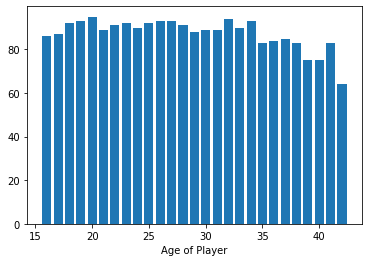

In [256]:
plt.bar(fifa["age"],fifa["potential"])
plt.xlabel("Age of Player")
plt.show()

# Linear regression. X axis= Age , Y axis= Potential
# Linear Regression - Predicting Potential based on Age of the player

FYI- Potential is the rating given on how he will perform the next year considering his form in previous years. Like there are players who have gradual increase in ratings every year whereas some have gradual decrease.
Some may also have ups and downs due to injuries. 

In [257]:
from sklearn.model_selection import train_test_split

In [258]:
from sklearn.linear_model import LinearRegression

In [259]:

X = np.array(fifa['age']).reshape(-1,1)
y = np.array(fifa['potential']).reshape(-1,1)
X.shape, y.shape

((18483, 1), (18483, 1))

In [260]:
from numpy.linalg import inv

const = np.ones(shape=y.shape)
mat = np.concatenate( (const, X), axis=1)

# first 5 examples
mat[:5,:]

array([[ 1., 32.],
       [ 1., 34.],
       [ 1., 27.],
       [ 1., 26.],
       [ 1., 28.]])

In [261]:
betas = inv(mat.transpose().dot(mat)).dot(mat.transpose()).dot(y)
b0, b1 = betas

print(f'Beta 0: {np.round(b0[0],3)}')
print(f'Beta 1: {np.round(b1[0],3)}')

Beta 0: 80.235
Beta 1: -0.345


In [262]:
yhat = mat.dot(betas)
yhat[:5, :]

array([[69.18057905],
       [68.48969378],
       [70.90779221],
       [71.25323485],
       [70.56234958]])

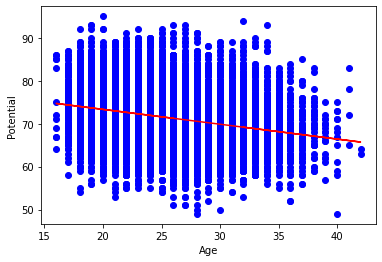

In [263]:

plt.plot(X, y, 'bo')
plt.plot(X, yhat, 'r')
plt.xlabel('Age')
plt.ylabel('Potential')

plt.show()

In [264]:
import statsmodels.api as smf

simpleModel = smf.OLS(y, mat).fit()
print(simpleModel.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     1362.
Date:                Mon, 11 Oct 2021   Prob (F-statistic):          1.12e-287
Time:                        22:32:08   Log-Likelihood:                -59115.
No. Observations:               18483   AIC:                         1.182e+05
Df Residuals:                   18481   BIC:                         1.182e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.2347      0.241    333.389      0.0

In [265]:
# x = Age(independent variable)
X=fifa.iloc[:,4]
# y = Potential(dependent variable)
y=fifa.iloc[:,13]

In [266]:
from sklearn.model_selection import train_test_split

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.20)

print(f'Training samples: {X_training.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 14,786
Test samples: 3,697


In [267]:
X_training=np.array(X_training)
y_training=np.array(y_training)


Was Facing Errors in Fitting the data so converted then to np array and then reshaped the data.

In [268]:
X_training=X_training.reshape(-1,1)
y_training=y_training.reshape(-1,1)

In [269]:
regressor.fit(X_training,y_training)

LinearRegression()

In [270]:
X_test=np.array(X_test)

In [271]:
X_test=X_test.reshape(-1,1)

Finding the r2 score and root mean squared error

In [272]:
a=regressor.predict(X_test)

In [285]:
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, a)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, a))))

r2 score: 0.06255872432608567
RMSE : 5.8896199044454605


In [273]:
from sklearn.metrics import mean_squared_error

predictions=regressor.predict(X_test)
mse=mean_squared_error(y_test, predictions)
rmse=np.sqrt(mse)
rmse

5.8896199044454605

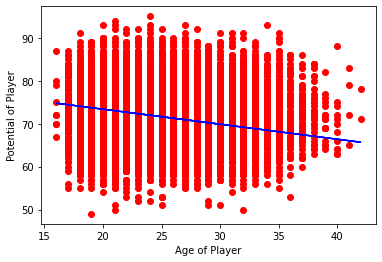

In [274]:
#vizualizing train set
plt.scatter(X_training,y_train,color="red")
plt.xlabel("Age of Player")
plt.ylabel("Potential of Player")
plt.plot(X_training, regressor.predict(X_training),color="blue") 
plt.show()

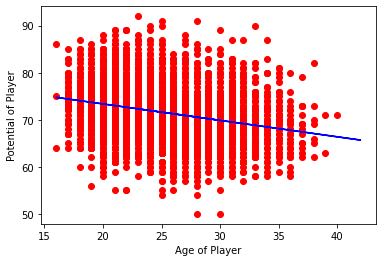

In [275]:
# Visualising test dataset
plt.scatter(X_test,y_test,color="red")
plt.xlabel("Age of Player")
plt.ylabel("Potential of Player")
plt.plot(X_training, regressor.predict(X_training),color="blue")
plt.show()

Trying the Ridge Regression and Lasso Regression.

In [276]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from numpy import absolute
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)

In [277]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [278]:
s = cross_val_score(clf, X_training, y_training, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [279]:
s = absolute(s)
print('Mean MAE: %.3f (%.3f)' % (mean(s), std(s)))

Mean MAE: 4.709 (0.096)


In [280]:
clf.fit(X_training, y_training)

Ridge()

In [281]:
train_preds = clf.predict(X_training)

In [282]:
train_preds = np.clip(train_preds, 0, 10)
train_preds.mean()

10.0

In [283]:
X_test = fifa[['age', 'potential']].values

In [284]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_training, y_training, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 4.717 (0.097)


In [286]:
lin_reg_1=LinearRegression()

In [287]:
lin_reg_1.fit(X_training,y_training)

LinearRegression()

In [288]:
X_test=np.array(X_test)

In [289]:
from sklearn.preprocessing import PolynomialFeatures

In [290]:
poly_reg=PolynomialFeatures(degree=3)

In [292]:
X=np.array(X)
X=X.reshape(-1,1)

In [294]:
x_poly=poly_reg.fit_transform(X)

In [295]:
x_poly

array([[1.0000e+00, 3.2000e+01, 1.0240e+03, 3.2768e+04],
       [1.0000e+00, 3.4000e+01, 1.1560e+03, 3.9304e+04],
       [1.0000e+00, 2.7000e+01, 7.2900e+02, 1.9683e+04],
       ...,
       [1.0000e+00, 1.9000e+01, 3.6100e+02, 6.8590e+03],
       [1.0000e+00, 1.8000e+01, 3.2400e+02, 5.8320e+03],
       [1.0000e+00, 2.6000e+01, 6.7600e+02, 1.7576e+04]])

In [296]:
x_poly_train,x_poly_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.2, random_state=42)

In [297]:
lin_reg_2=LinearRegression()

In [298]:
lin_reg_2.fit(x_poly_train,y_train)

LinearRegression()

In [299]:
y_pred_2=lin_reg_2.predict(x_poly_test)

Linear Regression Model Vs Polynomial regression Model

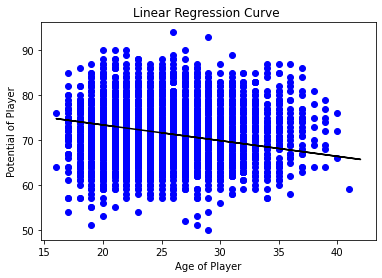

In [302]:
plt.scatter(x_test,y_test,color='blue')
plt.xlabel("Age of Player")
plt.ylabel("Potential of Player")
plt.title("Linear Regression Curve ")
plt.plot(x_train,lin_reg_1.predict(x_train),color='black')
plt.show()

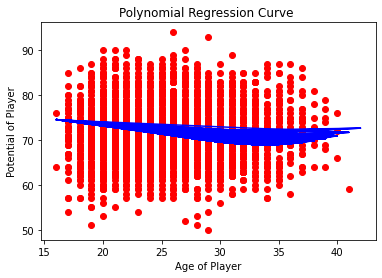

In [303]:
plt.scatter(x_test,y_test,color='red')
plt.xlabel("Age of Player")
plt.ylabel("Potential of Player")
plt.title("Polynomial Regression Curve ")
plt.plot(x_train,lin_reg_2.predict(poly_reg.fit_transform(x_train)),color='blue')
plt.show()